In [1057]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
from nltk.corpus import reuters, stopwords

In [1056]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [889]:
# Read your api key environment variable
api_key = os.getenv("news_api")
type(api_key)

str

In [890]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [891]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", language="en")
bitcoin_headlines['totalResults']

4321

In [892]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en")
ethereum_headlines['totalResults']

900

In [936]:

bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        title = article["title"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        bitcoin_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Bitcoin title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass
    


In [937]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Bitcoin title", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text
0,-0.1531,0.039,0.961,0.000,Inside the Icelandic Facility Where Bitcoin Is...,Less than two miles from Icelands Reykjavik ai...
1,0.2263,0.000,0.960,0.040,HTC's Exodus 1s can run a full Bitcoin node fo...,At least that's the idea. While it's not as in...
2,0.0000,0.000,1.000,0.000,French Students Will Now Have to Learn About B...,High school students in France may be among th...
3,0.4404,0.000,0.941,0.059,Debunking Blockchain once and for all,TL;DR: The in-depth Complete Blockchain and Et...
4,0.5070,0.000,0.931,0.069,Satoshi Nakaboto: ‘Chinese congress passes ‘cr...,Our robot colleague Satoshi Nakaboto writes ab...


In [933]:

ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        title = article['title']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        ethereum_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Ethereum title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass

In [938]:
# Create the ethereum sentiment scores DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Ethereum title", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text
0,0.4404,0.000,0.941,0.059,Debunking Blockchain once and for all,TL;DR: The in-depth Complete Blockchain and Et...
1,0.6249,0.000,0.900,0.100,Announcing the Disrupt Berlin 2019 agenda,Disrupt Berlin is right around the corner. And...
2,0.2263,0.000,0.960,0.040,HTC's Exodus 1s can run a full Bitcoin node fo...,At least that's the idea. While it's not as in...
3,0.4601,0.000,0.915,0.085,"Ethereum had a less than stellar Q3, intense 6...","he plaBy now, you should almost certainly know..."
4,-0.3089,0.055,0.945,0.000,A Comprehensive Guide to Top Blockchain Platforms,Blockchain has been picking up the pace since ...


In [939]:
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.424221,0.004789,0.929263,0.065947
std,0.256111,0.014509,0.036618,0.037628
min,-0.153100,0.000000,0.857000,0.000000
25%,0.333350,0.000000,0.916500,0.062500
50%,0.507000,0.000000,0.932000,0.068000
75%,0.539850,0.000000,0.937000,0.073000
max,0.816600,0.052000,1.000000,0.143000


In [940]:
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.280485,0.016100,0.919250,0.064700
std,0.365374,0.029755,0.068804,0.062945
min,-0.440400,0.000000,0.738000,0.000000
25%,0.000000,0.000000,0.905250,0.000000
50%,0.398300,0.000000,0.934000,0.058000
75%,0.500500,0.010500,0.952750,0.094750
max,0.862500,0.090000,1.000000,0.239000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin and Ethereum had similar mean positive scores, Bitcoin marginally higher

Q: Which coin had the highest compound score?

A: Ethereum had the highest maximum compound score

Q. Which coin had the highest positive score?

A:  Ethereum had the highest maximum positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [941]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [942]:
sw_addon = {'fucking', 'char', 'every', 'has', 'have', 'had', 'colleague'}


In [943]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
            
    return tokens


In [944]:
bitcoin_tokens = bitcoin_df.copy()

In [945]:
tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

In [946]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_text'] = tokens_df

In [947]:
tokenized = []
for i in bitcoin_tokens['Bitcoin title']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens title':tokenized_articles})

In [948]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_title'] = tokens_df

In [949]:
bitcoin_tokens.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text,tokens_text,tokens_title
0,-0.1531,0.039,0.961,0.000,Inside the Icelandic Facility Where Bitcoin Is...,Less than two miles from Icelands Reykjavik ai...,"[less, two, mile, icelands, reykjavik, airport...","[inside, icelandic, facility, bitcoin, mined]"
1,0.2263,0.000,0.960,0.040,HTC's Exodus 1s can run a full Bitcoin node fo...,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi...","[htcs, exodus, run, full, bitcoin, node]"
2,0.0000,0.000,1.000,0.000,French Students Will Now Have to Learn About B...,High school students in France may be among th...,"[high, school, student, france, may, among, fi...","[french, students, learn, bitcoin]"
3,0.4404,0.000,0.941,0.059,Debunking Blockchain once and for all,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum...","[debunking, blockchain]"
4,0.5070,0.000,0.931,0.069,Satoshi Nakaboto: ‘Chinese congress passes ‘cr...,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, satoshi, nakaboto, writes, bitcoin, da...","[satoshi, nakaboto, chinese, congress, pass, c..."


In [950]:
ethereum_tokens = ethereum_df.copy()

In [951]:
tokenized_eth = []
for i in ethereum_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})

In [952]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_text'] = tokens_df_eth

In [953]:
tokenized_eth = []
for i in ethereum_tokens['Ethereum title']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_title':tokenized_articles})

In [954]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_title'] = tokens_df_eth

In [955]:
ethereum_tokens.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text,tokens_text,tokens_title
0,0.4404,0.000,0.941,0.059,Debunking Blockchain once and for all,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum...","[debunking, blockchain]"
1,0.6249,0.000,0.900,0.100,Announcing the Disrupt Berlin 2019 agenda,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent...","[announcing, disrupt, berlin, agenda]"
2,0.2263,0.000,0.960,0.040,HTC's Exodus 1s can run a full Bitcoin node fo...,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi...","[htcs, exodus, run, full, bitcoin, node]"
3,0.4601,0.000,0.915,0.085,"Ethereum had a less than stellar Q3, intense 6...","he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth...","[ethereum, le, stellar, q, intense, month, ahe..."
4,-0.3089,0.055,0.945,0.000,A Comprehensive Guide to Top Blockchain Platforms,Blockchain has been picking up the pace since ...,"[blockchain, ha, picking, pace, since, incepti...","[comprehensive, guide, top, blockchain, platfo..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [956]:
from collections import Counter
from nltk import ngrams

In [1043]:
all_bitcoin_words = []
for text in bitcoin_tokens['tokens_text']:
    for word in text:
        all_bitcoin_words.append(word)

In [1044]:
all_eth_words = []
for text in ethereum_tokens['tokens_text']:
    for word in text:
        all_eth_words.append(word)

In [1045]:
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)

In [1046]:
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)

In [1047]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_15.items()), columns=['Bigram', 'Count'])

In [1048]:
bigram_counter(bitcoin_sent)

,Bigram,Count
0,"(satoshi, nakaboto)",26
1,"(robot, satoshi)",13
2,"(nakaboto, writes)",13
3,"(writes, bitcoin)",13
4,"(daywelcome, another)",13
5,"(another, edition)",13
6,"(edition, bitcoin)",13
7,"(bitcoin, today)",13
8,"(today, satoshi)",13
9,"(nakaboto, tell)",13


In [1049]:
bigram_counter(eth_sent)

,Bigram,Count
0,"(complete, blockchain)",3
1,"(blockchain, ethereum)",3
2,"(ethereum, programmer)",3
3,"(programmer, bundle)",3
4,"(dark, mode)",3
5,"(digital, currency)",2
6,"(ha, given)",2
7,"(given, goahead)",2
8,"(goahead, country)",2
9,"(hardware, wallet)",2


In [1050]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    Counter_words = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(Counter_words.items()), columns=['Word', 'Count'])

In [1051]:
token_count(all_bitcoin_words)

,Word,Count
0,bitcoin,44
1,satoshi,26
2,nakaboto,26
3,robot,13
4,writes,13
5,daywelcome,13
6,another,13
7,edition,13
8,today,13
9,tell,13


In [925]:
token_count(all_eth_words)

,Word,Count
0,cryptocurrency,10
1,bitcoin,8
2,ha,8
3,blockchain,6
4,ethereum,6
5,bundle,4
6,company,4
7,dark,4
8,time,4
9,complete,3


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [970]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [971]:
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

In [972]:
bitcoin_words = processed_text(all_bitcoin_words)
eth_words = processed_text(all_eth_words)

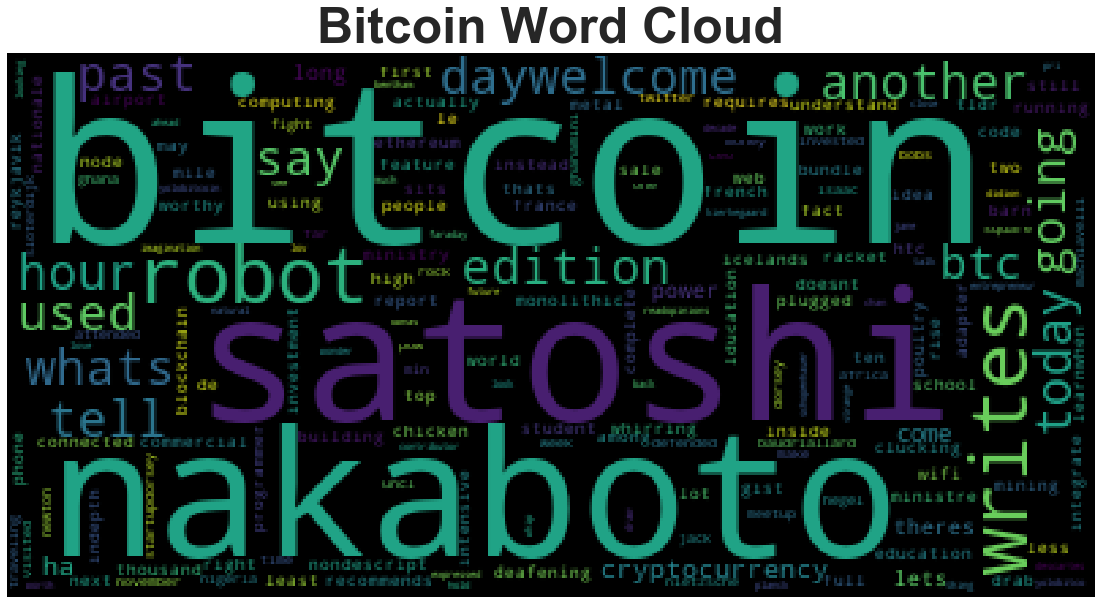

In [973]:
wc = WordCloud(collocations=False).generate(bitcoin_words)
fig = plt.figure()
plt.imshow(wc)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

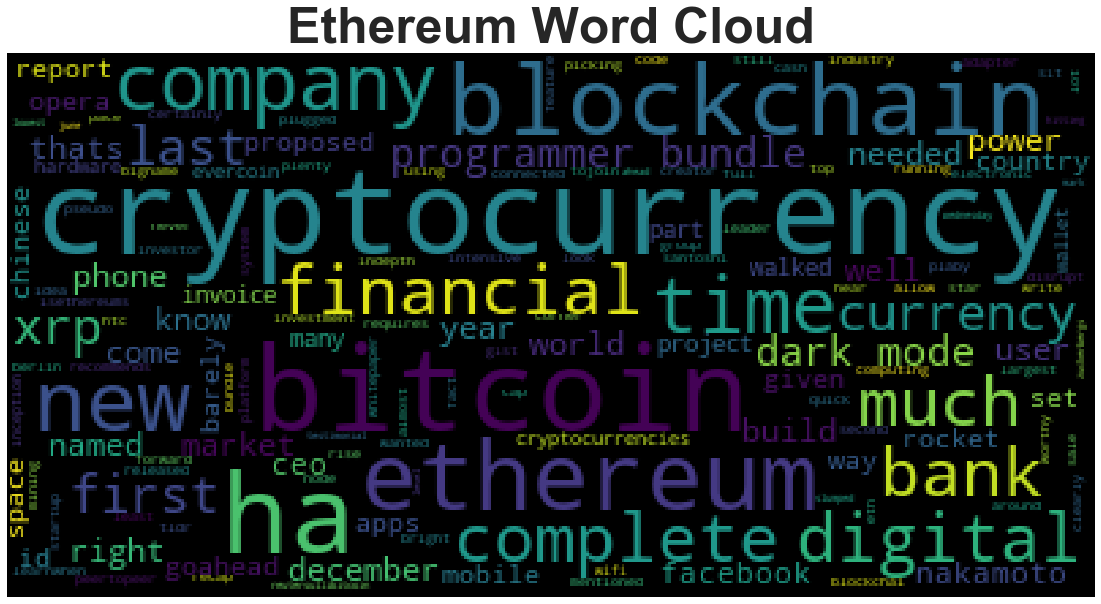

In [930]:
fig = plt.figure()
wc = WordCloud().generate(eth_words)
plt.imshow(wc)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [1052]:
import spacy
from spacy import displacy

In [1053]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [1054]:
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
big_string_bitcoin = ' '.join(bitcoin_sent)
big_string_bitcoin

"Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars] At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars] High school students in France may be among the first people in the world to actually understand how cryptocurrency works. \r\nThe Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars] TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Crypt

In [1035]:
bitcoin_doc = nlp(big_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin NER'
displacy.render(bitcoin_doc, style='ent')

In [979]:
#List all of the entities
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

Less than two miles QUANTITY
Reykjavik airport FAC
tens of thousands CARDINAL
Bitcoin PERSON
HTC ORG
France GPE
first ORDINAL
The Next Web WORK_OF_ART
French NORP
Le Ministère de lÉducation Nationale ORG
Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Baudriallard PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Nietzsche PERSON
Time ORG
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Isaac Newton PERSON
Square FAC
Jack Dorsey PERSON
Bitcoin PERSON
Ghana GPE
just weeks DATE
Dorsey PERSON
Bitcoin PERSON
Africa LOC
Ni

---

## Ethereum NER

In [839]:
# Concatenate all of the bitcoin text together
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
big_string_eth = " ".join(eth_sent)
big_string_eth

"TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… [+1491 chars] Disrupt Berlin is right around the corner. And there is plenty to look forward to.\r\nJoin us December 11 and December 12 to hear from industry leaders, investors, and bright stars in the startup world. We’ll sit down with CEOs from big-name companies such as A… [+14834 chars] At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars] he plaBy now, you should almost certainly know about Ethereum, ETH the second largest cryptocurrency by market cap. But if you needed a quick recap, here it is.\r\nEther

In [864]:
eth_doc = nlp(big_string_eth)
eth_doc.user_data['title'] = 'Ethereum NER'
displacy.render(eth_doc, style='ent')

In [1034]:
#List all of the entities
for ent in eth_doc.ents:
    print (ent, ent.label_)


Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
Bitcoin PERSON
Disrupt Berlin PERSON
December 11 and December 12 DATE
Bitcoin PERSON
HTC ORG
second ORDINAL
the year 2009 DATE
Santoshi Nakamoto PERSON
Nakamoto PERSON
Bitcoin PERSON
Blockchai GPE
Reuters ORG
Bitcoin PERSON
as much as 9% PERCENT
Wednesday DATE
June DATE
Facebook ORG
Mark Zuckerberg's PERSON
Libra GPE
Zuckerberg GPE
Swiss NORP
countrys NORP
Swiss NORP
Block ORG
Opera ORG
one CARDINAL
Opera Mobile ORG
the day DATE
six CARDINAL
XRP ORG
Bitcoin PERSON
XRP ORG
third ORDINAL
Bitcoin PERSON
the Complete Blockchain and Ethereum Programmer Bundle ORG
just $29 MONEY
first ORDINAL
last week DATE
Chinese NORP
2021 DATE
first ORDINAL
last year DATE
Chinese NORP
Tencent GPE
countrys NORP
British Columbia GPE
Canada GPE
+2554 ORG
May 2016 DATE
San Francisco GPE
Montgomery Street FAC
Wells Fargo ORG
two CARDINAL
The Complete Blockchain &amp ORG
Ethereum Programmer Bundle ORG
ten CARDINAL
eLearning ORG
Ethereum PRODUCT
+246